<a href="https://colab.research.google.com/github/ameyark28/Image-superimposing-StyleGAN/blob/main/Image_imposing_(Style_GAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [ ]:
content_image = load_image('/content/panda.jpeg')
style_image = load_image('/content/painting.jpeg')

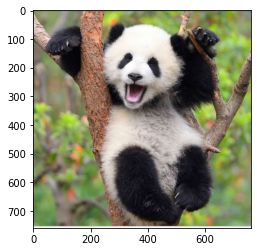

In [ ]:
plt.imshow(np.squeeze(content_image))

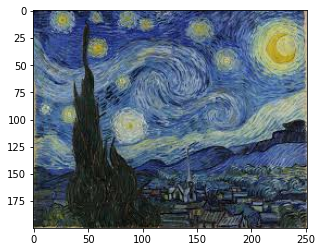

In [ ]:
plt.imshow(np.squeeze(style_image))

In [ ]:
final_image = model(content_image, style_image)[0]

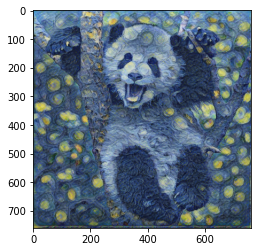

In [ ]:
plt.imshow(np.squeeze(final_image))

In [ ]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(final_image)*255, cv2.COLOR_BGR2RGB))

True